# Pneumonia Detection Using CNNs
This project uses a convolutional neural network (CNN) trained on chest X-ray images to classify whether a patient has pneumonia. The model is built using TensorFlow/Keras and achieves strong performance on test data.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator

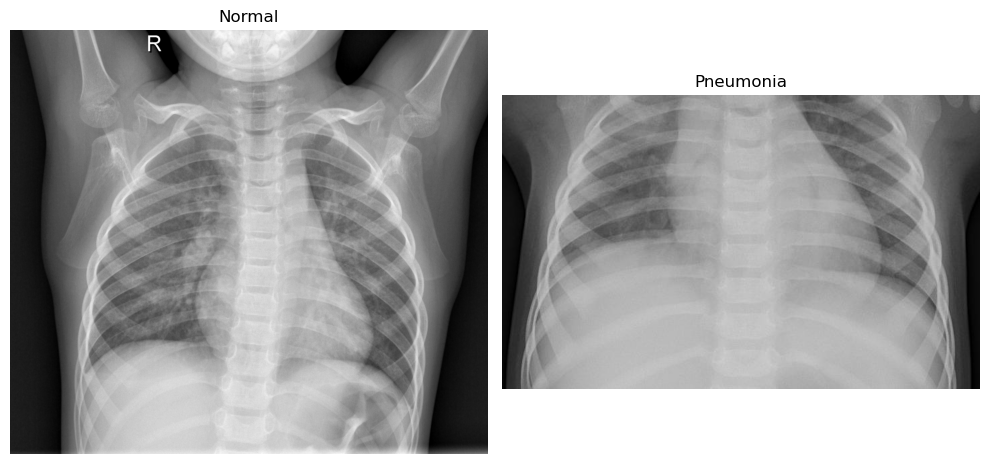

In [2]:
# Load example images from both classes
normal_img = PIL.Image.open("../data/raw/chest_xray/train/NORMAL/IM-0115-0001.jpeg")
pneumonia_img = PIL.Image.open("../data/raw/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg")

# Plot images side by side for visual comparison
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normal_img, cmap="gray")
plt.title("Normal")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(pneumonia_img, cmap="gray")
plt.title("Pneumonia")
plt.axis("off")

plt.tight_layout()
plt.show()

### Visual Analysis of Chest X-Rays

Pneumonia often presents on chest X-rays as regions of increased opacity (whiteness), typically in the lower lobes. These opacities are caused by **inflammatory exudate** filling the **alveolar spaces**, which blocks the passage of X-rays.

In contrast:

- **Normal lungs** appear darker (radiolucent) due to air-filled alveoli allowing X-rays to pass through.
- **Pneumonia-infected lungs** display localized or diffuse white patches (consolidation), indicating fluid accumulation from infection.

These patterns form the visual foundation for training a convolutional neural network (CNN), which learns to distinguish between healthy and pneumonia-affected lungs based on pixel-level differences in chest radiographs.


In [3]:
# Load and preprocess training images from directory
training_dir = "../data/raw/chest_xray/train"
training_generator = ImageDataGenerator(rescale=1/255)

data_train = training_generator.flow_from_directory(
    training_dir,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)

Found 5217 images belonging to 2 classes.


In [4]:
# Load and preprocess validation images for model evaluation during training
valid_dir = "../data/raw/chest_xray/val"
validation_generator = ImageDataGenerator(rescale=1/255)

data_valid = validation_generator.flow_from_directory(
    valid_dir,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)

Found 16 images belonging to 2 classes.


In [5]:
# Load and preprocess test images for final performance evaluation
test_dir = "../data/raw/chest_xray/test"
test_generator = ImageDataGenerator(rescale=1/255)

data_test = test_generator.flow_from_directory(
    test_dir,
    target_size=(120, 120),
    batch_size=8,
    class_mode="binary"
)

Found 624 images belonging to 2 classes.


In [6]:
# Define a deep CNN model for binary classification on X-ray images
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")  # Sigmoid for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [7]:
# Compile and train binary CNN classifier for pneumonia detection
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

history = model.fit(
    data_train, 
    epochs=10, 
    validation_data=data_valid
)

Epoch 1/10


2025-06-29 17:28:47.372943: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2025-06-29 17:28:47.375612: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


653/653 [==============================] - 27s 40ms/step - loss: 0.3173 - accuracy: 0.8687 - val_loss: 0.9747 - val_accuracy: 0.6875
Epoch 2/10


2025-06-29 17:29:13.867750: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


653/653 [==============================] - 31s 47ms/step - loss: 0.1212 - accuracy: 0.9540 - val_loss: 0.2658 - val_accuracy: 0.8750
Epoch 3/10
653/653 [==============================] - 32s 49ms/step - loss: 0.0884 - accuracy: 0.9663 - val_loss: 1.2569 - val_accuracy: 0.6875
Epoch 4/10
653/653 [==============================] - 32s 50ms/step - loss: 0.0690 - accuracy: 0.9730 - val_loss: 0.7243 - val_accuracy: 0.8125
Epoch 5/10
653/653 [==============================] - 32s 49ms/step - loss: 0.0603 - accuracy: 0.9766 - val_loss: 0.7941 - val_accuracy: 0.7500
Epoch 6/10
653/653 [==============================] - 33s 51ms/step - loss: 0.0578 - accuracy: 0.9791 - val_loss: 0.0958 - val_accuracy: 1.0000
Epoch 7/10
653/653 [==============================] - 40s 61ms/step - loss: 0.0444 - accuracy: 0.9833 - val_loss: 1.3239 - val_accuracy: 0.7500
Epoch 8/10
653/653 [==============================] - 50s 77ms/step - loss: 0.0384 - accuracy: 0.9860 - val_loss: 0.4892 - val_accuracy: 0.7500
Epo

In [8]:
# Evaluate model performance on unseen test data
model.evaluate(data_test)

 3/78 [>.............................] - ETA: 2s - loss: 0.6266 - accuracy: 0.8750

2025-06-29 17:34:50.682936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


78/78 [==============================] - 3s 39ms/step - loss: 2.1214 - accuracy: 0.7548


[2.121432304382324, 0.754807710647583]

1/1 [==============================] - 0s 17ms/step


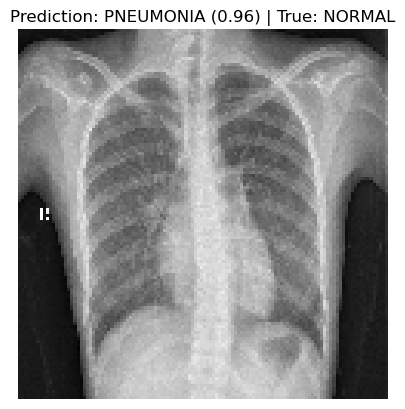

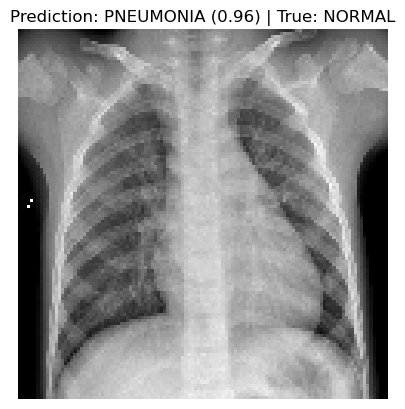

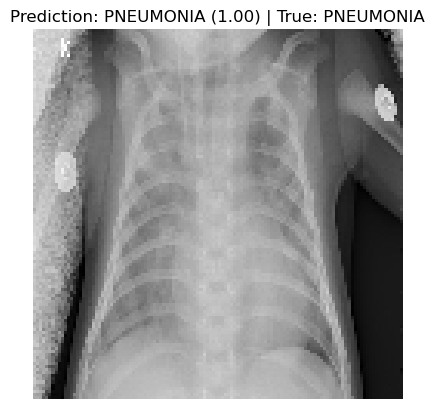

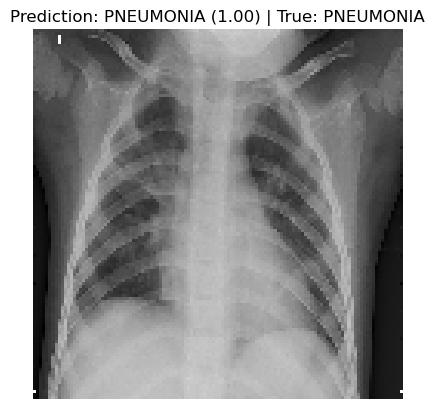

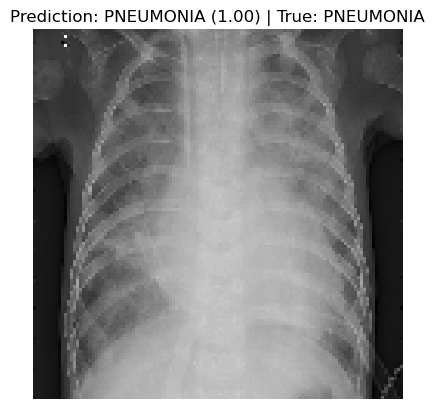

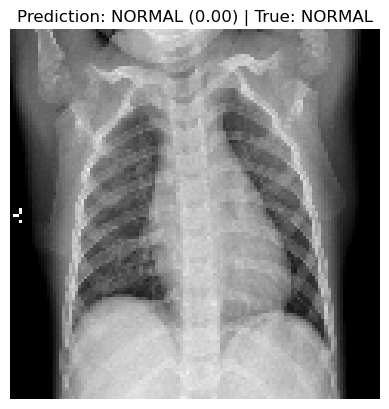

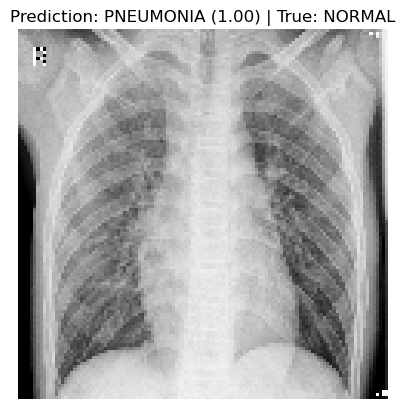

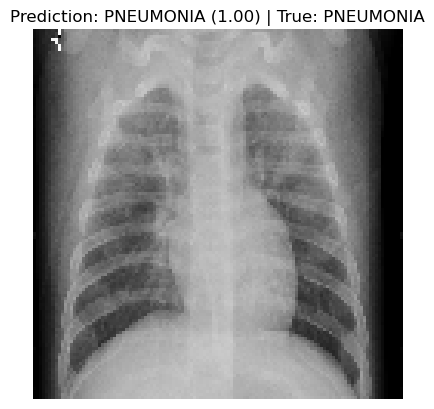

In [33]:
# Visualize 8 random predictions from test batch
x_test_batch, y_test_batch = next(iter(data_test))
predictions = model.predict(x_test_batch)
random_indices = random.sample(range(len(x_test_batch)), 8)

for idx in random_indices:
    plt.imshow(x_test_batch[idx])
    plt.axis('off')
    pred_prob = predictions[idx][0]
    predicted_label = "PNEUMONIA" if pred_prob > 0.5 else "NORMAL"
    true_label = "PNEUMONIA" if y_test_batch[idx] == 1 else "NORMAL"
    plt.title(f"Prediction: {predicted_label} ({pred_prob:.2f}) | True: {true_label}")
    plt.show()

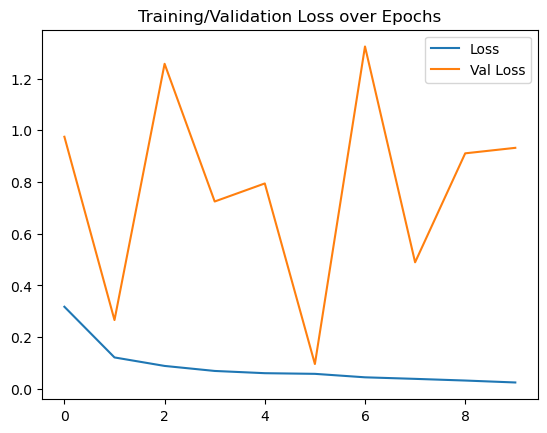

In [34]:
# Plot training and validation loss to assess model convergence and potential overfitting
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Training/Validation Loss over Epochs")
plt.show()

1/1 [==============================] - 0s 15ms/step


<Figure size 600x600 with 0 Axes>

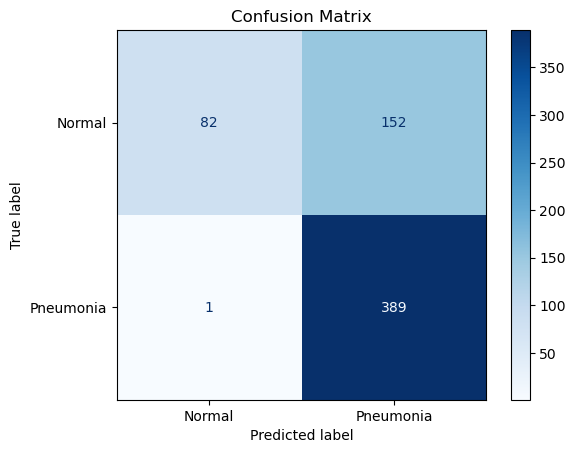

In [35]:
# Generate predictions and compute confusion matrix for test set evaluation

y_true = []
y_pred = []

# Reset generator before predicting
data_test.reset()

for i in range(len(data_test)):
    x_batch, y_batch = data_test[i]
    preds = model.predict(x_batch)
    
    y_true.extend(y_batch)
    y_pred.extend(preds)

y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

cm = confusion_matrix(y_true, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Pneumonia"])

plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 0s 19ms/step


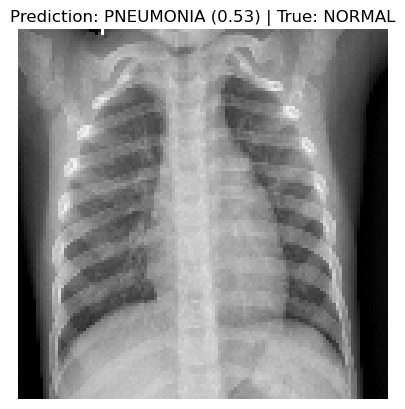

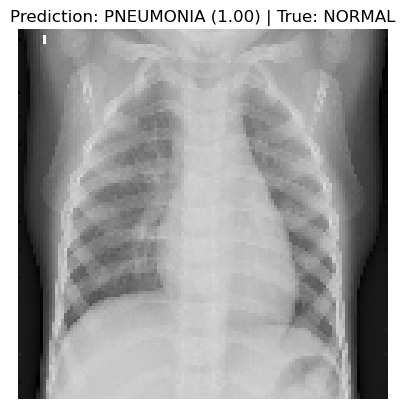

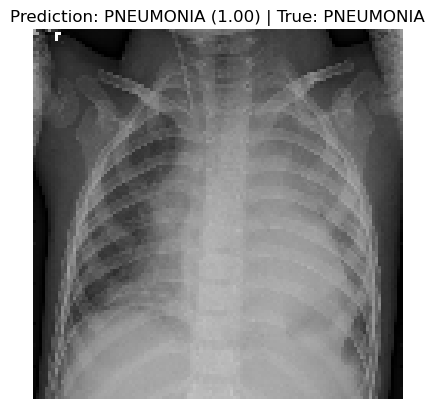

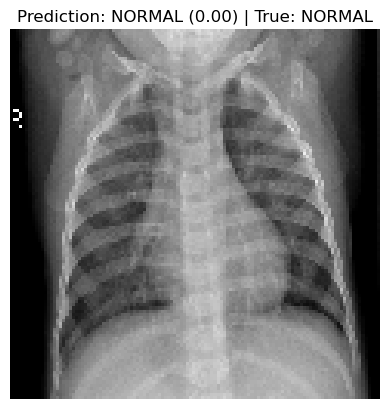

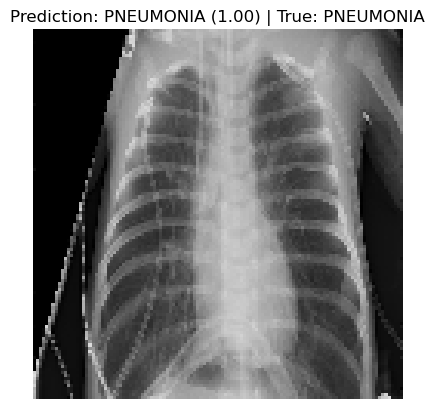

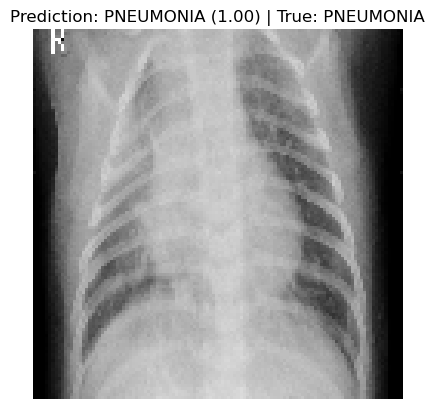

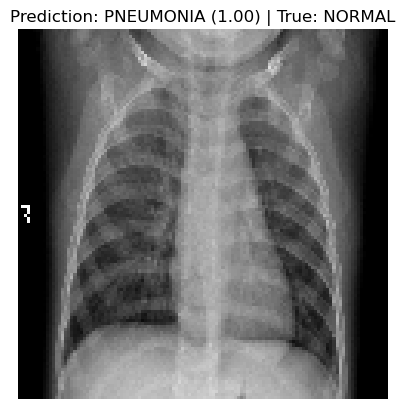

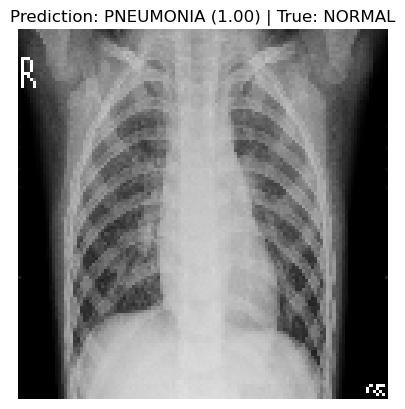

In [47]:
# Get one batch of data from the test generator
x_test_batch, y_test_batch = next(iter(data_test))

# Predict on that batch
predictions = model.predict(x_test_batch)

# Randomly select 8 indices
random_indices = random.sample(range(len(x_test_batch)), 8)

# Plot predictions
for idx in random_indices:
    plt.imshow(x_test_batch[idx])
    plt.axis('off')

    pred_prob = predictions[idx][0]
    predicted_label = "PNEUMONIA" if pred_prob > 0.5 else "NORMAL"
    true_label = "PNEUMONIA" if y_test_batch[idx] == 1 else "NORMAL"

    plt.title(f"Prediction: {predicted_label} ({pred_prob:.2f}) | True: {true_label}")
    plt.show()

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.35      0.52       234
   Pneumonia       0.72      1.00      0.84       390

    accuracy                           0.75       624
   macro avg       0.85      0.67      0.68       624
weighted avg       0.82      0.75      0.72       624

ROC-AUC Score: 0.9265


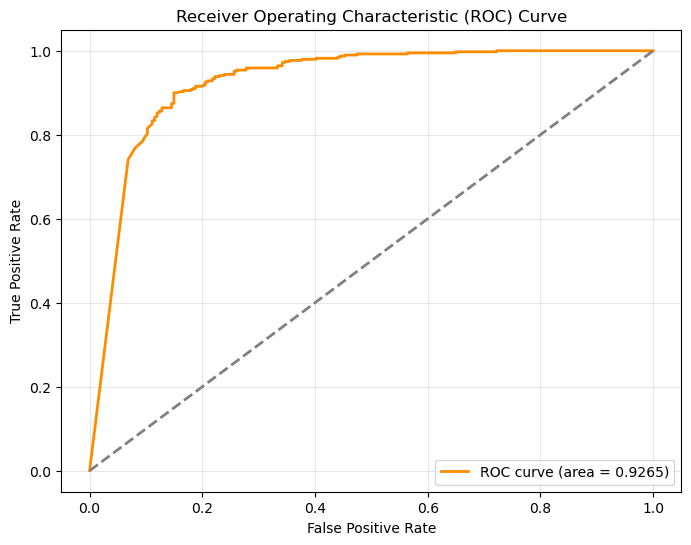

In [41]:
# Generate classification metrics and ROC-AUC score
print("Classification Report:")
print(classification_report(y_true, y_pred_binary, target_names=["Normal", "Pneumonia"]))

roc_auc = roc_auc_score(y_true, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc_value:.4f})")
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()